In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib
%matplotlib inline

In [92]:
df = pd.read_csv('card_transdataset.csv')

In [93]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [94]:
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
5,5.586408,13.261073,0.064768,1,0,0,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0
7,4.848247,0.320735,1.273050,1,0,1,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0


In [95]:
df.shape

(9999, 8)

In [96]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [97]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              9999 non-null   float64
 1   distance_from_last_transaction  9999 non-null   float64
 2   ratio_to_median_purchase_price  9999 non-null   float64
 3   repeat_retailer                 9999 non-null   int64  
 4   used_chip                       9999 non-null   int64  
 5   used_pin_number                 9999 non-null   int64  
 6   online_order                    9999 non-null   int64  
 7   fraud                           9999 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [45]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,26.377253,4.807546,1.824213,0.879088,0.350735,0.104810,0.641464,0.084108
std,58.813512,22.261194,2.762572,0.326041,0.477224,0.306324,0.479595,0.277564
min,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.810070,0.305211,0.489014,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.027137,1.006690,1.005496,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.868282,3.313808,2.091424,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997    False
9998    False
Length: 9999, dtype: bool

In [54]:
df['used_chip']=df['used_chip'].fillna(df['used_chip'].mean())
df['online_order']=df['online_order'].fillna(df['online_order'].mean())
df['fraud']=df['fraud'].fillna(df['fraud'].mean())

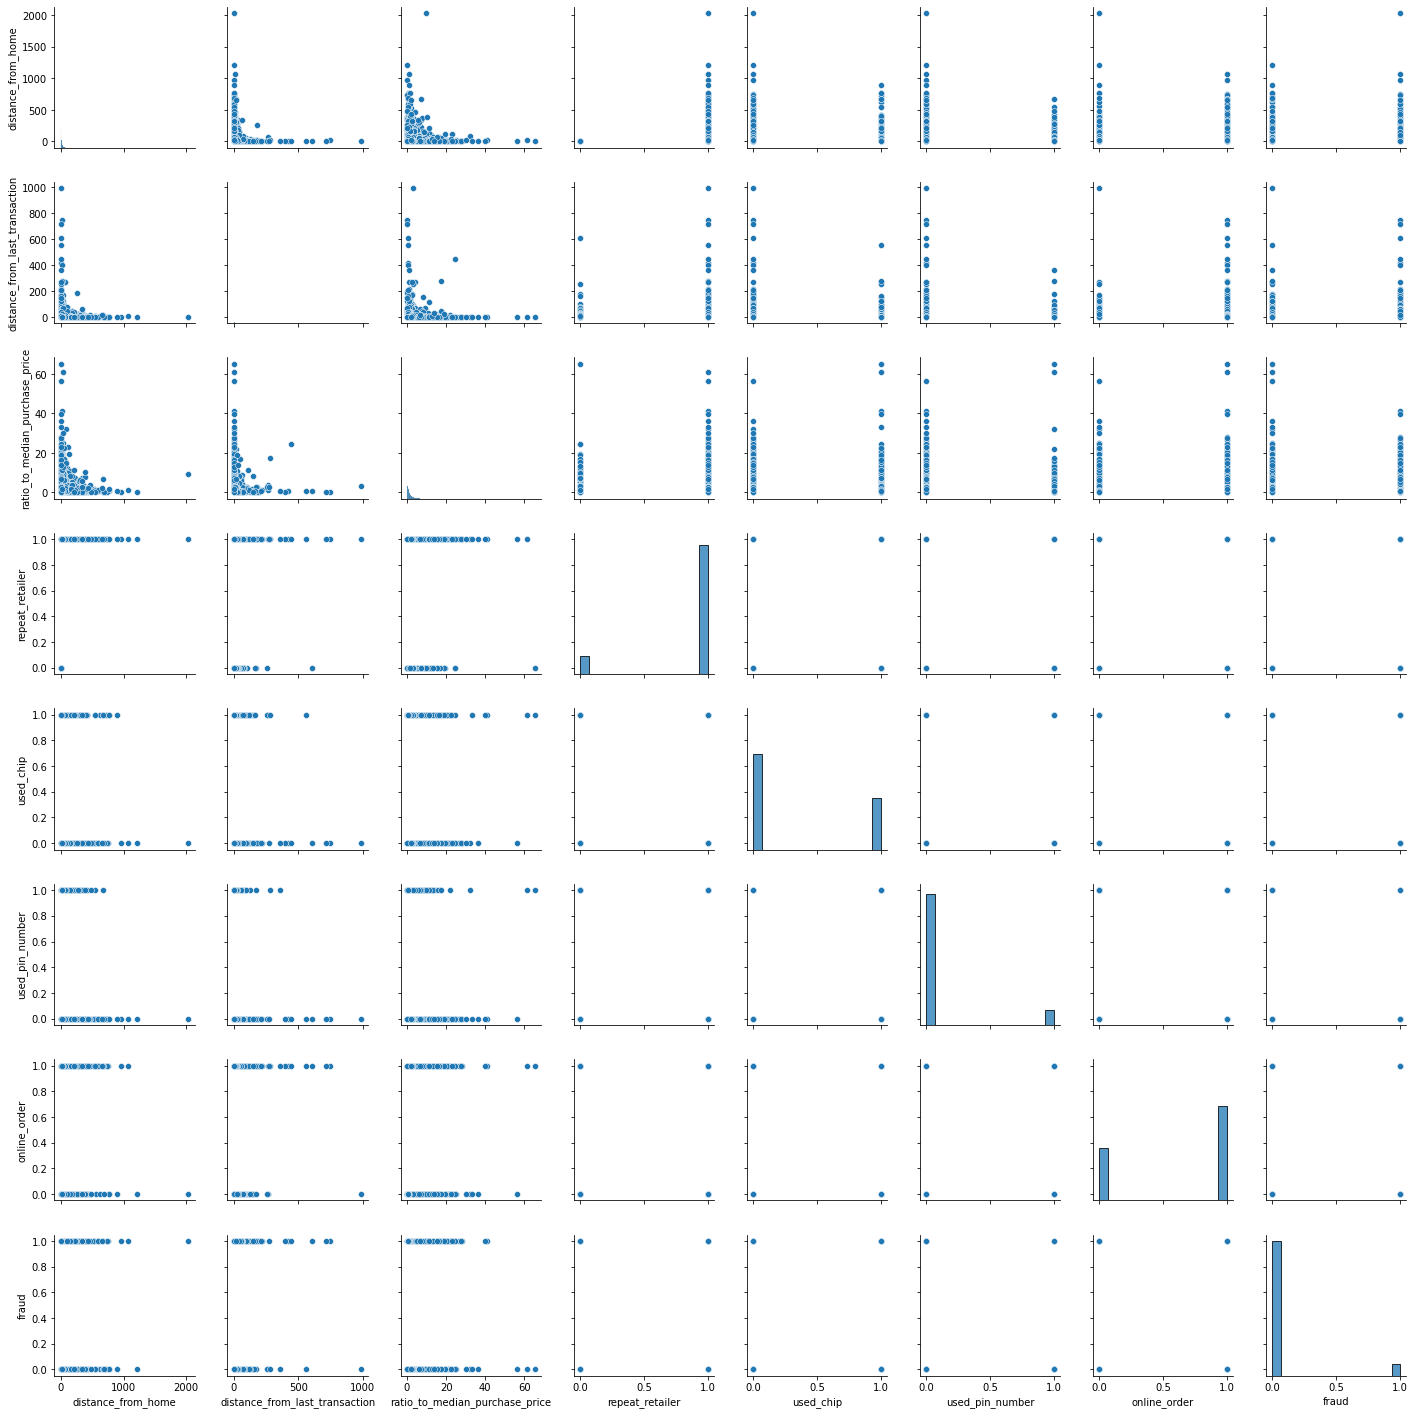

In [47]:
sns.pairplot(df)

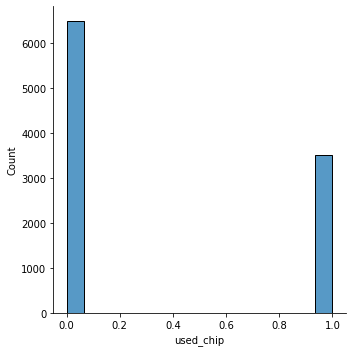

In [55]:
sns.displot(df['used_chip'])

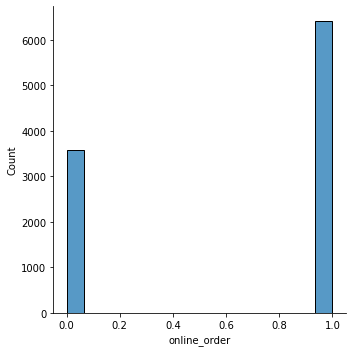

In [56]:
sns.displot(df['online_order'])

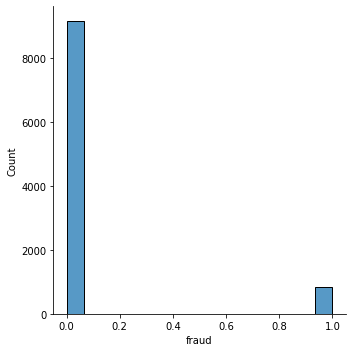

In [51]:
sns.displot(df['fraud'])

In [57]:
## create new attribute
df['New attribute']=df['used_chip'] + df['online_order']

In [58]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,New attribute
0,57.877857,0.311140,1.945940,1,1,0,0,0,1
1,10.829943,0.175592,1.294219,1,0,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0,1
3,2.247564,5.600044,0.362663,1,1,0,1,0,2
4,44.190936,0.566486,2.222767,1,1,0,1,0,2


In [52]:
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.007827,-0.011736,0.159290,-0.003850,0.009667,-0.003978,0.195005
distance_from_last_transaction,-0.007827,1.000000,0.013422,0.003380,-0.010845,-0.000539,0.016513,0.109739
ratio_to_median_purchase_price,-0.011736,0.013422,1.000000,0.001593,0.016223,0.005865,-0.004452,0.436467
repeat_retailer,0.159290,0.003380,0.001593,1.000000,0.005167,-0.005292,0.010573,-0.001451
used_chip,-0.003850,-0.010845,0.016223,0.005167,1.000000,-0.009969,-0.003765,-0.070955
used_pin_number,0.009667,-0.000539,0.005865,-0.005292,-0.009969,1.000000,-0.012428,-0.101339
online_order,-0.003978,0.016513,-0.004452,0.010573,-0.003765,-0.012428,1.000000,0.204768
fraud,0.195005,0.109739,0.436467,-0.001451,-0.070955,-0.101339,0.204768,1.000000


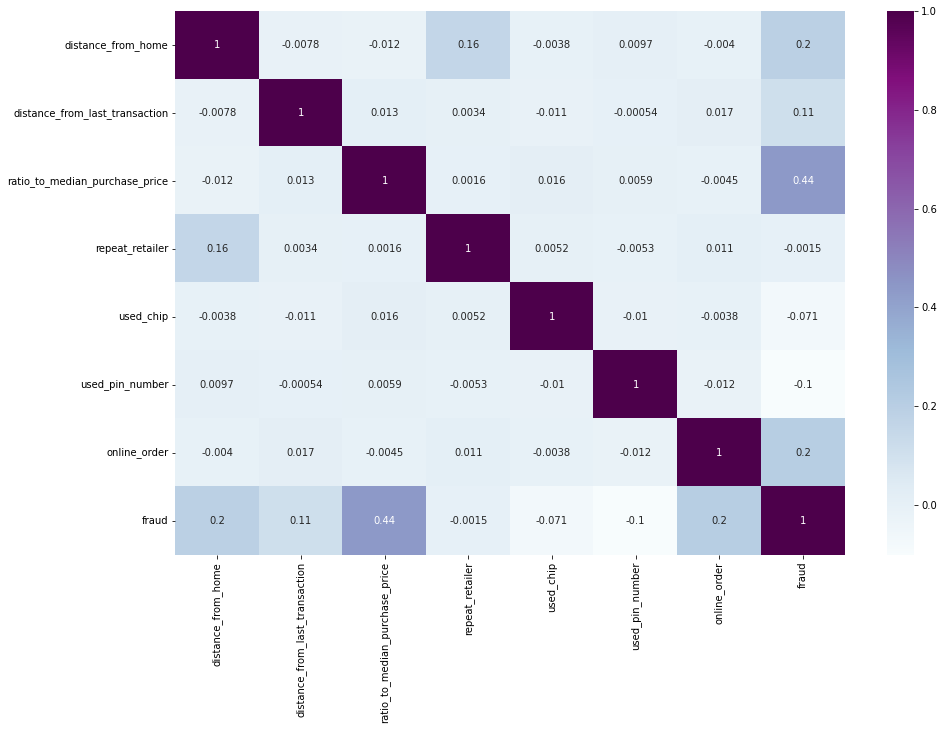

In [53]:
corr=df.corr() 
plt.figure(figsize=(15,10)) 
sns.heatmap(corr, annot=True,cmap="BuPu")

In [59]:
#drop unnesessary columns
cols=['ratio_to_median_purchase_price','used_pin_number']
df=df.drop(columns=cols, axis=1)

In [60]:
df.head()

,distance_from_home,distance_from_last_transaction,repeat_retailer,used_chip,online_order,fraud,New attribute
0,57.877857,0.311140,1,1,0,0,1
1,10.829943,0.175592,1,0,0,0,0
2,5.091079,0.805153,1,0,1,0,1
3,2.247564,5.600044,1,1,1,0,2
4,44.190936,0.566486,1,1,1,0,2


In [62]:
X = df[['distance_from_home', 'distance_from_last_transaction',
        'repeat_retailer', 'used_chip'
      , 'online_order']]

In [63]:
y = df['fraud']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [66]:
X_test.head()

,distance_from_home,distance_from_last_transaction,repeat_retailer,used_chip,online_order
937,1.484454,1.096308,0,0,0
9354,1.375561,0.877712,0,0,1
5337,11.099450,0.478889,1,1,1
192,5.148886,0.702110,1,1,1
8050,9.061939,0.604696,1,0,1


In [67]:
y_test

937     0
9354    0
5337    1
192     0
8050    0
       ..
8977    0
9560    1
5274    0
9653    0
4956    0
Name: fraud, Length: 3000, dtype: int64

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
Fraud = LinearRegression()

In [70]:
Fraud.fit(X_train,y_train)

LinearRegression()

In [71]:
Fraud.coef_

array([ 0.0009489 ,  0.00135952, -0.02781366, -0.04226044,  0.11630761])

In [72]:
Fraud.intercept_

0.016815986832837707

In [73]:
predictions = Fraud.predict(X_test)

In [74]:
predictions

array([0.01971503, 0.13562213, 0.07423282, ..., 0.06133034, 0.13427217,
       0.10733847])

In [75]:
y_test

937     0
9354    0
5337    1
192     0
8050    0
       ..
8977    0
9560    1
5274    0
9653    0
4956    0
Name: fraud, Length: 3000, dtype: int64

Text(0, 0.5, 'pre')

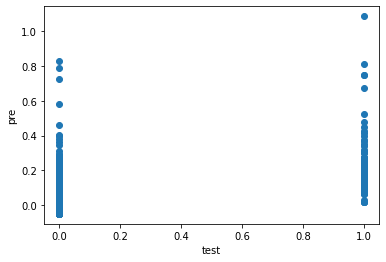

In [76]:
plt.scatter(y_test,predictions)
plt.xlabel("test")
plt.ylabel("pre")

In [77]:
Fraud.score(X_test,y_test)

0.08626254857623583

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predDtc = dtc.predict(X_test)
dtc.score(X_test, y_test)

0.8833333333333333

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
confusion_matrix(y_test,predDtc)

array([[2573,  173],
       [ 177,   77]])

In [81]:
print(classification_report(y_test,predDtc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2746
           1       0.31      0.30      0.31       254

    accuracy                           0.88      3000
   macro avg       0.62      0.62      0.62      3000
weighted avg       0.88      0.88      0.88      3000



In [84]:
X = df.drop(columns=["fraud"], axis=1)
y = df["fraud"]

In [85]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [86]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
def classify(model,x,y):
  X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
  model.fit(X_train,y_train)
  print("Accuracy is", model.score(x_test,y_test)*100)
 
  y_predict=model.predict(x_test)
  print('confusion martrix is:',confusion_matrix(y_test,y_predict))
  sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
  print('calssification report is',classification_report(y_test,y_predict))
  
  #cross validation
  
  score=cross_val_score(model,x,y,cv=5)
  print('Cross validation is', np.mean(score)*100)

Accuracy is 92.4
confusion martrix is: [[2291    7]
 [ 183   19]]
calssification report is               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2298
           1       0.73      0.09      0.17       202

    accuracy                           0.92      2500
   macro avg       0.83      0.55      0.56      2500
weighted avg       0.91      0.92      0.90      2500

Cross validation is 91.85917958979489


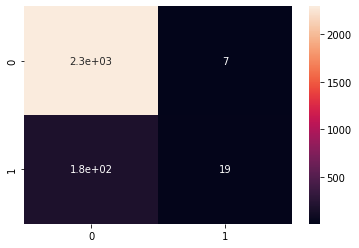

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy is 88.64
confusion martrix is: [[2151  147]
 [ 137   65]]
calssification report is               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2298
           1       0.31      0.32      0.31       202

    accuracy                           0.89      2500
   macro avg       0.62      0.63      0.63      2500
weighted avg       0.89      0.89      0.89      2500

Cross validation is 87.74878939469734


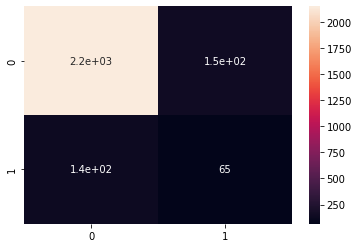

In [88]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 93.44
confusion martrix is: [[2277   21]
 [ 143   59]]
calssification report is               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2298
           1       0.74      0.29      0.42       202

    accuracy                           0.93      2500
   macro avg       0.84      0.64      0.69      2500
weighted avg       0.92      0.93      0.92      2500

Cross validation is 92.96926463231617


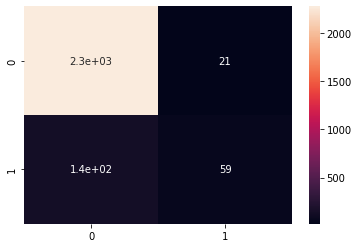

In [89]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy is 92.47999999999999
confusion martrix is: [[2261   37]
 [ 151   51]]
calssification report is               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2298
           1       0.58      0.25      0.35       202

    accuracy                           0.92      2500
   macro avg       0.76      0.62      0.66      2500
weighted avg       0.91      0.92      0.91      2500

Cross validation is 91.88919459729865


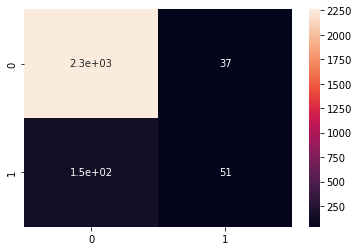

In [90]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classify(model,X,y)